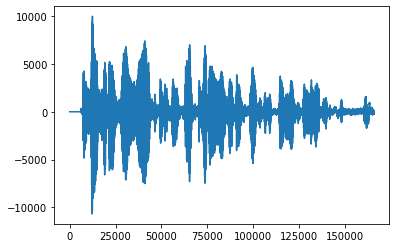

In [1]:
from scipy import signal
from scipy.io import wavfile
from scipy.fftpack import fft
import matplotlib.pyplot as plt
import numpy as np

freq, x = wavfile.read('mono1.wav')

ar = []
for i in x:
	ar.append(i * 2)
x = ar

plt.plot(x)

/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


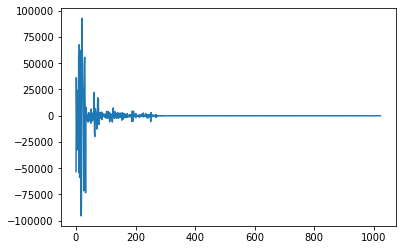

In [2]:
N = 2048
overlap = 0.25
resolution = float(freq) / N

rangeR_r = 350
rangeL_r = 160
rangeR = rangeR_r / resolution
rangeL = rangeL_r / resolution

buffer = []
array_buffer = []
i = 0
i_of_N = 0

while i < len(x):
	if i_of_N < N:
		buffer.append(x[i])
		i += 1
		i_of_N += 1
	else:
		i -= int(N * overlap)
		array_buffer.append(buffer)
		buffer = []
		i_of_N = 0

window = np.hamming(N)
arrayN = []
for period in array_buffer:
	period *= window
	arrayN.append(fft(period)[:N//2])

plt.plot(arrayN[40])

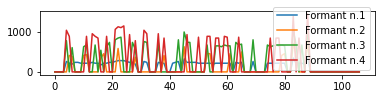

In [3]:
formant = [[[],[],[],[]],[[],[],[],[]],[[],[],[],[]],[[],[],[],[]]]	 # 4x [per, freq, pernum, freqnum]
num_of_period = 0

absmaxper = 0

for period in arrayN:
	maxper = 0
	maxfreq = 0
	harmonics = [0, 0, 0]
	freqses = [0, 0, 0]
	for i in range(int(np.floor(rangeL)), int(np.ceil(rangeR) + 1)):
		if np.abs(period[i]) > maxper:
			maxper = np.abs(period[i])
			maxfreq = i
	if maxper < 150000:	# unsufficent maximum
		maxper = 0
		maxfreq = 0
	formant[0][0].append(maxper)

	if maxper > absmaxper:	# calculate absolute maximum
		absmaxper = maxper

	formant[0][1].append(maxfreq * resolution)
	formant[0][2].append(num_of_period)
	formant[0][3].append(maxfreq)

	for j in range(2, 5):
		for i in range(formant[0][3][num_of_period] * j - 1, formant[0][3][num_of_period] * j + 2):
			if np.abs(period[i]) > harmonics[j - 2] and np.abs(period[i]) < formant[0][0][num_of_period] * pow(0.2, j - 1):
				harmonics[j - 2] = np.abs(period[i])
				freqses[j - 2] = i

		formant[j - 1][0].append(harmonics[j - 2])
		formant[j - 1][1].append(resolution * freqses[j - 2])
		formant[j - 1][2].append(num_of_period)
		formant[j - 1][3].append(freqses[j - 2])
	
	num_of_period += 1
plt.subplot(3,1,3)
for i in range(4):
	st = "Formant n." + str(i + 1)
	plt.plot(formant[i][2], formant[i][1], label=st)

plt.legend()
plt.show()

/srv/conda/envs/notebook/lib/python3.6/site-packages/ipykernel_launcher.py:21: ComplexWarning: Casting complex values to real discards the imaginary part
/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


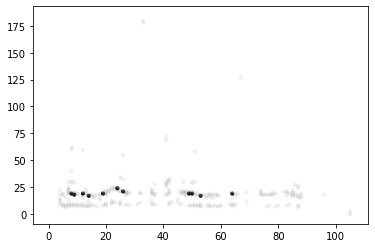

In [4]:
#absmaxper *= 0.05

def getcol(inp):
	for i in range(1,11):
		if inp < (absmaxper * (float(i)/10)):
			return (1.0 / i, 1.0 / i, 1.0 / i, 0.1)
	return (0,0,0)

boundaries = (50, 4000)
steps = 1024

num_of_period = 0
x = []
y = []
color = []
for period in arrayN:
	innum = 0
	for i in range(int(np.floor(boundaries[0] / resolution)), int(np.ceil(boundaries[1] / resolution)) + 1):
		x.append(num_of_period)
		y.append(innum)
		color.append(getcol(int(np.round(period[i]))))
		innum += 1
	num_of_period += 1

plt.scatter(x, y, s=10, c=color)